In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 3.7/149.9 MB 27.3 MB/s eta 0:00:06
   -- ------------------------------------- 9.2/149.9 MB 27.1 MB/s eta 0:00:06
   --- ------------------------------------ 14.7/149.9 MB 25.6 MB/s eta 0:00:06
   ----- ---------------------------------- 19.4/149.9 MB 25.0 MB/s eta 0:00:06
   ------ --------------------------------- 23.9/149.9 MB 24.3 MB/s eta 0:00:06
   ------- -------------------------------- 28.0/149.9 MB 23.7 MB/s eta 0:00:06
   -------- ------------------------------- 31.7/149.9 MB 23.1 MB/s eta 0:00:06
   --------- ------------------------------ 35.7/149.9 MB 22.6 MB/s eta 0:00:06
   ---------- ----------------------------- 39.8/149.9 MB 22.4 MB/s eta 0:00:05
   ----------- ---------------------------- 43.8/149.9 MB 22.1 MB/s eta 0:00:05
   ------------ --------------------------- 47.7/149.9 MB 21.8 MB/s eta 0:00:05
   ------------- -------------------------- 51.6/14

In [1]:
! pip install shapely

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 3.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.9 MB/s eta 0:00:00


In [2]:
from skimage import io, color, feature, morphology, measure
import os
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from skimage import util


# Function to extract features from an image
from shapely.geometry import Polygon

def extract_features(image_path):
    # Load the image as grayscale
    image = io.imread(image_path, as_gray=True)

    # Shape-based features
    contours = measure.find_contours(image, 0.5)
    contour = max(contours, key=len)  # Choose the longest contour
    perimeter = len(contour)
    poly = Polygon(contour)
    area = poly.area
    eccentricity = measure.regionprops(contour.astype(int))[0].eccentricity
    solidity = measure.regionprops(contour.astype(int))[0].solidity
    compactness = perimeter**2 / (4 * np.pi * area)

    # Texture-based features
    glcm = feature.graycomatrix((image * 255).astype(np.uint8), [1], [0], 256, symmetric=True, normed=True)
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]

    # Intensity-based features
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)

    return {
        'Perimeter': perimeter,
        'Area': area,
        'Eccentricity': eccentricity,
        'Solidity': solidity,
        'Compactness': compactness,
        'Contrast': contrast,
        'Energy': energy,
        'Homogeneity': homogeneity,
        'Correlation': correlation,
        'MeanIntensity': mean_intensity,
        'StdIntensity': std_intensity
    }

# Path to the folder containing the lung images
data_path = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Full data\\"

# List of folders containing different types of lung images
folders = ['Normal cases', 'Bengin cases', 'Malignant cases']

# List to store the features and labels
features = []
labels = []

# Loop through each folder
for folder in folders:
    class_path = os.path.join(data_path, folder)
    if os.path.isdir(class_path):
        # Loop through each image in the folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            # Extract features from the image
            image_features = extract_features(image_path)
            features.append(image_features)
            labels.append(folder)

# Create a DataFrame to store the features and labels
df = pd.DataFrame(features)
df['Label'] = labels

# Save the DataFrame to a CSV file
df.to_csv('lung_image_features.csv', index=False)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the CSV file containing the image features
df = pd.read_csv('lung_image_features.csv')
scaler = StandardScaler()
#df = scaler.fit_transform(df)
# Split the data into features (X) and labels (y)
X = df.drop('Label', axis=1)
X = scaler.fit_transform(X)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
print("Random Forest")
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


Random Forest
Accuracy: 0.9545454545454546
                 precision    recall  f1-score   support

   Bengin cases       0.95      0.69      0.80        29
Malignant cases       0.98      1.00      0.99       119
   Normal cases       0.92      0.99      0.95        72

       accuracy                           0.95       220
      macro avg       0.95      0.89      0.91       220
   weighted avg       0.95      0.95      0.95       220



In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.9499562368414827
Overall Recall: 0.8919220945083014
Overall F1-score: 0.9135240004827017
Overall Accuracy: 0.9545454545454546


In [5]:

import pickle

# Save the model to disk
with open('random_forest_model_image_features_20image.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the CSV file containing the image features
# df = pd.read_csv('lung_image_features.csv')

# # Split the data into features (X) and labels (y)
# X = df.drop('Label', axis=1)
# y = df['Label']

from sklearn.preprocessing import LabelEncoder
# Create and train the model
le=LabelEncoder()
y_encoded=le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

# Train an XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
print("XG Boost")
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


XG Boost
Accuracy: 0.9590909090909091
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.98      1.00      0.99       119
           2       0.93      0.97      0.95        72

    accuracy                           0.96       220
   macro avg       0.94      0.91      0.92       220
weighted avg       0.96      0.96      0.96       220



In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.9444903581267218
Overall Recall: 0.9102809706257982
Overall F1-score: 0.9247454327643007
Overall Accuracy: 0.9590909090909091


In [8]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = svm_model.predict(X_test)
print("SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=folders))

SVM Results:
Confusion Matrix:
[[  3   2  24]
 [  0 111   8]
 [  0   0  72]]

Classification Report:
                 precision    recall  f1-score   support

   Normal cases       1.00      0.10      0.19        29
   Bengin cases       0.98      0.93      0.96       119
Malignant cases       0.69      1.00      0.82        72

       accuracy                           0.85       220
      macro avg       0.89      0.68      0.65       220
   weighted avg       0.89      0.85      0.81       220



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.8915361924211481
Overall Recall: 0.678740461701922
Overall F1-score: 0.654192789968652
Overall Accuracy: 0.8454545454545455


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn)) 

# Save the model to disk
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)


KNN Results:
[[ 18   1  10]
 [  7 110   2]
 [  3   2  67]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        29
           1       0.97      0.92      0.95       119
           2       0.85      0.93      0.89        72

    accuracy                           0.89       220
   macro avg       0.82      0.83      0.82       220
weighted avg       0.89      0.89      0.89       220



In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')
accuracy = accuracy_score(y_test, y_pred_knn)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.821469912037852
Overall Recall: 0.825204986209043
Overall F1-score: 0.822424009326811
Overall Accuracy: 0.8863636363636364


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb)) 

# Save the model to disk
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


Naive Bayes Results:
[[  6  18   5]
 [  1 114   4]
 [  4  44  24]]
              precision    recall  f1-score   support

           0       0.55      0.21      0.30        29
           1       0.65      0.96      0.77       119
           2       0.73      0.33      0.46        72

    accuracy                           0.65       220
   macro avg       0.64      0.50      0.51       220
weighted avg       0.66      0.65      0.61       220



In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_nb, average='macro')
recall = recall_score(y_test, y_pred_nb, average='macro')
f1 = f1_score(y_test, y_pred_nb, average='macro')
accuracy = accuracy_score(y_test, y_pred_nb)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.6401515151515151
Overall Recall: 0.4994043594449274
Overall F1-score: 0.5100080710250202
Overall Accuracy: 0.6545454545454545


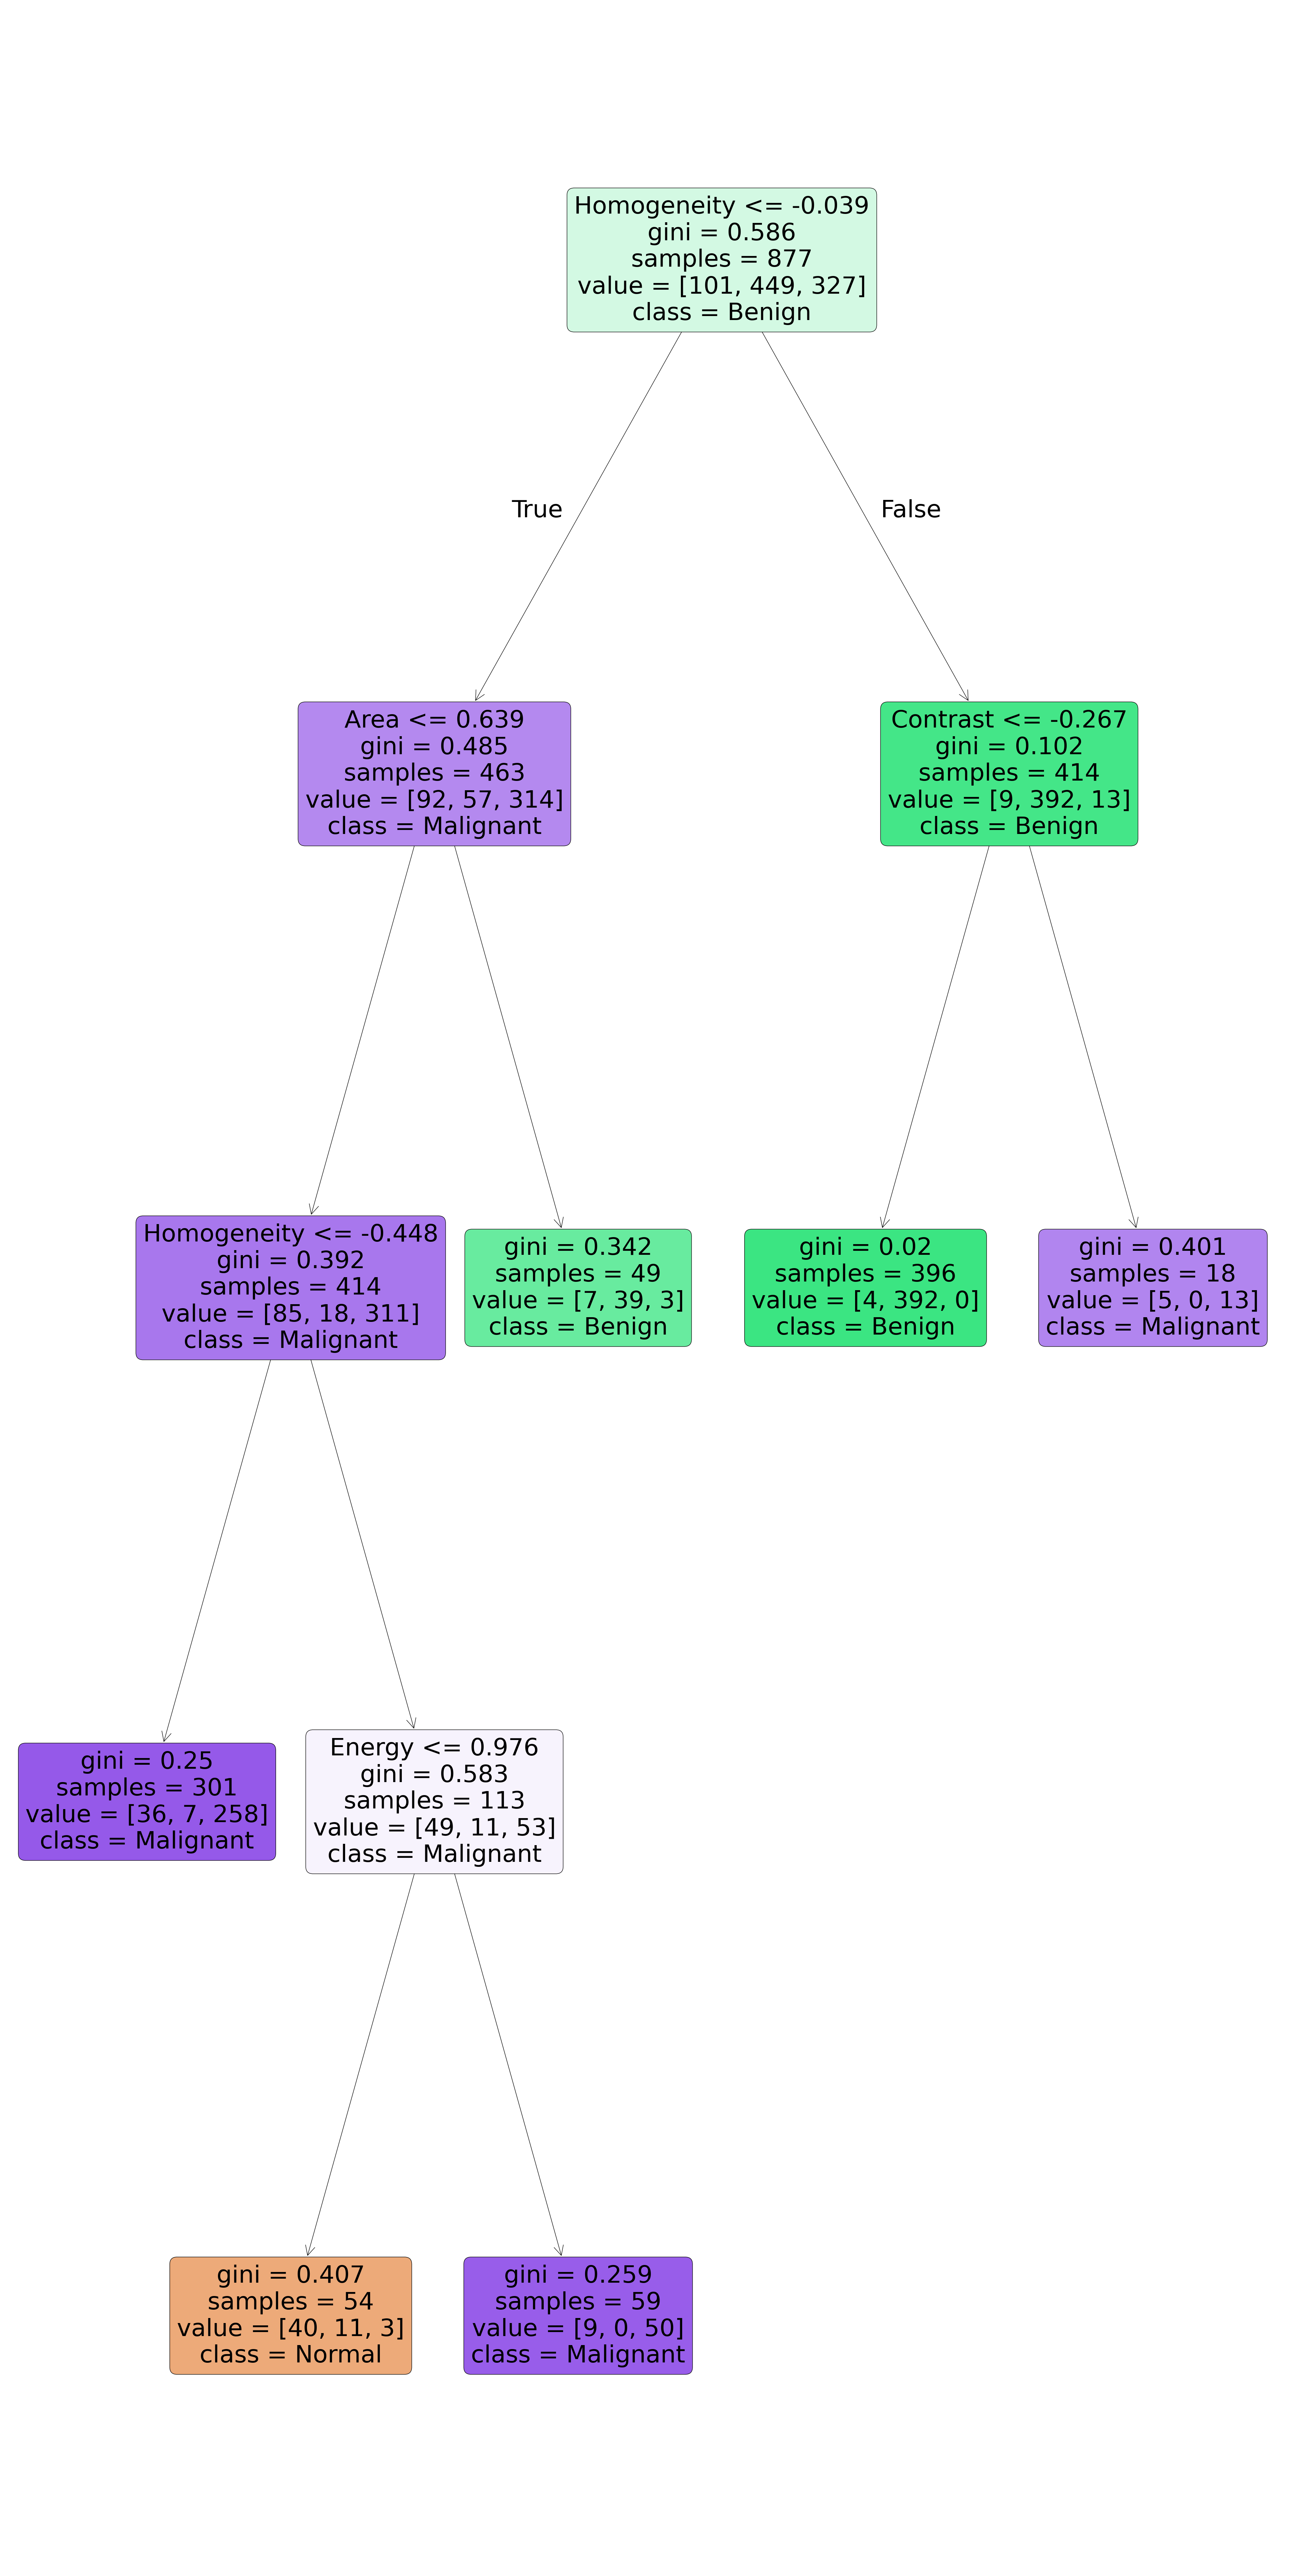

Accuracy: 0.8954545454545455
                 precision    recall  f1-score   support

   Bengin cases       0.67      0.32      0.43        19
Malignant cases       0.95      0.96      0.96       112
   Normal cases       0.86      0.93      0.89        89

       accuracy                           0.90       220
      macro avg       0.82      0.74      0.76       220
   weighted avg       0.89      0.90      0.88       220



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the image features
df = pd.read_csv('lung_image_features.csv')

# # Split the data into features (X) and labels (y)
X = df.drop('Label', axis=1)
y = df['Label']
X_old=X
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(50, 100))
plot_tree(clf, filled=True, feature_names=X_old.columns, class_names=['Normal', 'Benign', 'Malignant'],fontsize=52, rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.8232350636040272
Overall Recall: 0.7375531525442821
Overall F1-score: 0.7589322530801264
Overall Accuracy: 0.8954545454545455


In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Standardize the features (important for KNN)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)  # Number of neighbors
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])  # Distance metric
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Weight function
    p = trial.suggest_int('p', 1, 2)  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)

    # Create the KNN model with the hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights, p=p)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy  # Return the accuracy as the objective to maximize

# Create an Optuna study and optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=5000)  # Number of trials can be adjusted based on time and computation

# Print the best hyperparameters and corresponding accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Optionally, you can train the model with the best parameters
best_params = study.best_params
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                metric=best_params['metric'],
                                weights=best_params['weights'],
                                p=best_params['p'])

best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)

# Final Evaluation
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy with Optimized KNN: {accuracy_best_knn * 100:.2f}%")


[I 2024-11-26 20:01:25,247] A new study created in memory with name: no-name-054f2db3-f96d-46ec-aa76-dcb03d17cedb
[I 2024-11-26 20:01:25,261] Trial 0 finished with value: 0.9078341013824884 and parameters: {'n_neighbors': 15, 'metric': 'manhattan', 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9078341013824884.
[I 2024-11-26 20:01:25,267] Trial 1 finished with value: 0.9493087557603687 and parameters: {'n_neighbors': 13, 'metric': 'minkowski', 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9493087557603687.
[I 2024-11-26 20:01:25,272] Trial 2 finished with value: 0.9493087557603687 and parameters: {'n_neighbors': 11, 'metric': 'minkowski', 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9493087557603687.
[I 2024-11-26 20:01:25,276] Trial 3 finished with value: 0.9585253456221198 and parameters: {'n_neighbors': 4, 'metric': 'manhattan', 'weights': 'distance', 'p': 2}. Best is trial 3 with value: 0.9585253456221198.
[I 2024-11-26 20:01:25,281] 

Best Hyperparameters: {'n_neighbors': 3, 'metric': 'manhattan', 'weights': 'distance', 'p': 1}
Best Accuracy: 0.9677
Accuracy with Optimized KNN: 96.77%


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
# Define the range of random states to test
random_states = range(0, 50)  # Adjust this range as needed

best_knn_params= {'n_neighbors': 3, 'metric': 'manhattan', 'weights': 'distance', 'p': 1}
# Define the models with initial parameters
models = {
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(n_jobs=-1),  # Assuming best_params are defined
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
}

# Dictionary to store the best random state and accuracy for each model
best_results = {}

# Iterate through each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    best_accuracy = 0
    best_random_state = None
    accuracy_dict = {}
    
    # Iterate through each random state
    for state in random_states:
        # Check if the model has a random_state parameter
        if 'random_state' in model.get_params():
            model.set_params(random_state=state)

        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_dict[state] = accuracy
        
        # Update best accuracy and random state if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = state
        
        # Print accuracy for the current random state
        print(f"Random State {state}: Accuracy = {accuracy:.2%}")

    # Store the best random state and accuracy for the current model
    best_results[model_name] = {
        'Best Random State': best_random_state,
        'Best Accuracy': best_accuracy,
        'All Accuracies': accuracy_dict
    }

    # Print the best random state and accuracy for the current model
    print(f"\nBest Random State for {model_name}: {best_random_state}")
    print(f"Best Accuracy for {model_name}: {best_accuracy:.2%}")

# Print summary of best results for all models
print("\nSummary of Best Results:")
for model_name, results in best_results.items():
    print(f"{model_name}: Best Random State = {results['Best Random State']}, Best Accuracy = {results['Best Accuracy']:.2%}")



Evaluating Random Forest...
Random State 0: Accuracy = 97.27%
Random State 1: Accuracy = 98.18%
Random State 2: Accuracy = 97.73%
Random State 3: Accuracy = 97.27%
Random State 4: Accuracy = 96.82%
Random State 5: Accuracy = 97.73%
Random State 6: Accuracy = 97.27%
Random State 7: Accuracy = 97.27%
Random State 8: Accuracy = 97.27%
Random State 9: Accuracy = 97.27%
Random State 10: Accuracy = 97.27%
Random State 11: Accuracy = 97.27%
Random State 12: Accuracy = 97.27%
Random State 13: Accuracy = 97.27%
Random State 14: Accuracy = 97.73%
Random State 15: Accuracy = 97.27%
Random State 16: Accuracy = 96.82%
Random State 17: Accuracy = 97.27%
Random State 18: Accuracy = 97.73%
Random State 19: Accuracy = 97.27%
Random State 20: Accuracy = 97.73%
Random State 21: Accuracy = 97.73%
Random State 22: Accuracy = 97.73%
Random State 23: Accuracy = 97.27%
Random State 24: Accuracy = 97.27%
Random State 25: Accuracy = 97.27%
Random State 26: Accuracy = 97.27%
Random State 27: Accuracy = 97.73%
R

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming best parameters are already defined:
# best_xgb_params, best_rf_params, best_knn_params, best_svm_params

best_xgb_params={'random_state':0}
best_rf_params={'random_state':1}
# Define the models with best parameters
models = {
    "XGBoost": XGBClassifier(**best_xgb_params),
    "Random Forest": RandomForestClassifier(**best_rf_params),
    "KNN": KNeighborsClassifier(**best_knn_params),
    "SVM": SVC(probability=True)  # Using probability=True for ROC/PR-AUC
}

# Binarize the true labels for PR-AUC and ROC-AUC calculations (required for multiclass)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Dictionary to store metrics for each model
metrics = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict classes
    y_pred = model.predict(X_test)
    
    # Predict probabilities for AUC metrics
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:  # For models like SVM without `predict_proba`, use decision_function
        y_pred_proba = model.decision_function(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate PR-AUC and ROC-AUC
    pr_auc = average_precision_score(y_test_binarized, y_pred_proba, average="macro")
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")
    
    # Store metrics for the current model
    metrics[model_name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy,
        "PR-AUC": pr_auc,
        "ROC-AUC": roc_auc
    }

# Print metrics for each model
for model_name, metric_values in metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metric_values.items():
        print(f"  {metric_name}: {value:.2%}")



Metrics for XGBoost:
  Precision: 97.75%
  Recall: 97.73%
  F1-Score: 97.72%
  Accuracy: 97.73%
  PR-AUC: 98.89%
  ROC-AUC: 99.40%

Metrics for Random Forest:
  Precision: 98.21%
  Recall: 98.18%
  F1-Score: 98.16%
  Accuracy: 98.18%
  PR-AUC: 99.49%
  ROC-AUC: 99.79%

Metrics for KNN:
  Precision: 94.94%
  Recall: 95.00%
  F1-Score: 94.96%
  Accuracy: 95.00%
  PR-AUC: 93.50%
  ROC-AUC: 98.18%

Metrics for SVM:
  Precision: 91.87%
  Recall: 90.91%
  F1-Score: 88.99%
  Accuracy: 90.91%
  PR-AUC: 81.80%
  ROC-AUC: 94.63%
